## COVID Dataset

In [ ]:
import numpy as np
import pandas as pd
from pandas.core.common import flatten
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Reading the data using Pandas library
df = pd.read_csv('covid_train1.csv')

#Here we are replacing <20 in Age_Group with 10 so that Sklearn can process it
df.loc[(df.Age_Group == '<20'),'Age_Group']='10'

#Here we are replacing the missing valves in Outbreak_Related as "No"
df['Outbreak_Related'] = df['Outbreak_Related'].fillna("No")

#Here, we are dropping any row which has any missing values.
df = df.dropna(how='any')

#Here we are cleaning the 's' in the Age_Group so that sklearn accept the data
df = df.reset_index(drop=True)
df['Age_Group'] = df['Age_Group'].str.replace(r'\D', '')
df.isnull().sum(axis=0)

#Label encoding
le = preprocessing.LabelEncoder()
leOR = preprocessing.LabelEncoder()
leAg = preprocessing.LabelEncoder()

#Here, we are labeling encoding the Outcome1 as Ordinal Categorical (Seriousness or severity of the outcome) data - 0 1 2
le.fit(df.Outcome1)
le.fit(['Fatal', 'Not Resolved', 'Resolved'])
le.classes_
df['Outcome1'] = le.transform(df['Outcome1'])

#Here, we are labeling encoding the Outbreak_Related as binary - 0 1
leOR.fit(df.Outbreak_Related)
leOR.fit(['Yes', 'No'])
leOR.classes_
df['Outbreak_Related'] = leOR.transform(df['Outbreak_Related'])

#Here, we are labeling encoding the Age_Group so that Sklearn treats this feature as Ordinal Categorical data
leAg.fit(df.Age_Group)
leAg.fit(['10', '20', '30', '40', '50', '60', '70', '80', '90'])
leAg.classes_
#df['Age_Group'] = leAg.transform(df['Age_Group'])

df_pp = df

#One-hot-encoding
enc = OneHotEncoder(handle_unknown='ignore')

en_CG = enc.fit_transform(df[['Client_Gender']]).toarray()
column_name_Gender = enc.get_feature_names(['Client_Gender'])
enc_df_Gender = pd.DataFrame(en_CG, columns= column_name_Gender)

en_CA = enc.fit_transform(df[['Case_AcquisitionInfo']]).toarray()
column_name_CA = enc.get_feature_names(['Case_AcquisitionInfo'])
enc_df_CA = pd.DataFrame(en_CA, columns= column_name_CA)

df = df.join(enc_df_Gender)
df = df.join(enc_df_CA)

en_City = enc.fit_transform(df[['Reporting_PHU_City']]).toarray()
column_name_City = enc.get_feature_names(['Reporting_PHU_City'])
enc_df_City = pd.DataFrame(en_City, columns= column_name_City)

df = df.join(enc_df_City)
#####################################################################
#df = df.drop(['Outbreak_Related'], axis = 1) 
#df = df.drop(['Reporting_PHU_Latitude'], axis = 1) 
#df = df.drop(['Reporting_PHU_Longitude'], axis = 1) 

df = df.drop(['Client_Gender'], axis = 1) 
df = df.drop(['Case_AcquisitionInfo'], axis = 1) 
df = df.drop(['Reporting_PHU_City'], axis = 1) 
df_OC = df['Outcome1']
df = df.drop(['Outcome1'], axis = 1) 
dfX = df
df = df.join(df_OC)

#X = df_pp.iloc[:,:-1].values
#y = df_pp.iloc[:,7].values
X = df.iloc[:,:-1].values
y = df.iloc[:,48].values

#Split arrays or matrices into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 275)
print(df.shape)
df.head()

MD_range_F = [3, 5, 10, None]
scores_list_for = []
for k in MD_range_F:
    #print(k)
    clf = DecisionTreeClassifier(max_depth=k, random_state=0)
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10)
    scores_list_for.append(scores.mean())
    
MD_range_T = ['3', '5', '10', 'None']
df_plot = pd.DataFrame({'Max_Depth': MD_range_T, 'Mean_Accuracy': scores_list_for})
plt.title('DT Mean Accuracy for varying Max Depth')
sns.set_theme(style="darkgrid")
ax = sns.pointplot(x="Max_Depth", y="Mean_Accuracy", data=df_plot)



(14845, 49)


In [ ]:
print('Max Depth 10:')
DT_clf = DecisionTreeClassifier(max_depth=10, random_state=0)
print("Decision Tree Score on train data: ")
print(DT_clf.fit(X_train, y_train).score(X_train, y_train))
print("Decision Tree Score on test data: ")
print(DT_clf.fit(X_train, y_train).score(X_test, y_test))

print('Max Depth 5:')
DT_clf = DecisionTreeClassifier(max_depth=5, random_state=0)
print("Decision Tree Score on train data: ")
print(DT_clf.fit(X_train, y_train).score(X_train, y_train))
print("Decision Tree Score on test data: ")
print(DT_clf.fit(X_train, y_train).score(X_test, y_test))

Max Depth 10:
Decision Tree Score on train data: 
0.6887841023913776
Decision Tree Score on test data: 
0.6641966992253284
Max Depth 5:
Decision Tree Score on train data: 
0.6642809026608285
Decision Tree Score on test data: 
0.6709329740653419


In [ ]:
df

,Age_Group,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Client_Gender_FEMALE,Client_Gender_GENDER DIVERSE,Client_Gender_MALE,Client_Gender_UNSPECIFIED,Case_AcquisitionInfo_CC,Case_AcquisitionInfo_MISSING INFORMATION,...,Reporting_PHU_City_Stratford,Reporting_PHU_City_Sudbury,Reporting_PHU_City_Thorold,Reporting_PHU_City_Thunder Bay,Reporting_PHU_City_Timmins,Reporting_PHU_City_Toronto,Reporting_PHU_City_Waterloo,Reporting_PHU_City_Whitby,Reporting_PHU_City_Windsor,Outcome1
0,50,0,43.413997,-79.744796,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,20,0,43.524881,-80.233743,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,90,1,44.410713,-79.686306,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,20,0,43.656591,-79.379358,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
4,90,1,45.345665,-75.763912,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14840,10,0,43.257631,-79.871341,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
14841,20,0,43.647471,-79.708893,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
14842,80,1,43.116537,-79.241220,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
14843,50,0,44.048023,-79.480239,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Random Forest Mean Accuracy


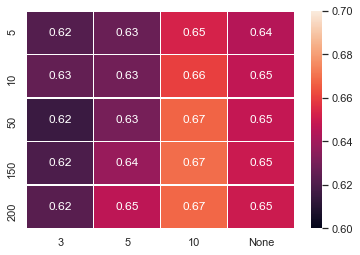

In [ ]:
MD_range = [3, 5, 10, None]
NT_range = [5, 10, 50, 150, 200]
scores_RF= {}
scores_list_RF = np.zeros( (5, 4) )

lj=0
for j in NT_range:
    lk=0 
    for k in MD_range:
        classifier = RandomForestClassifier(n_estimators=j, max_depth=k, random_state=0)
        scores_RF=cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
        scores_list_RF[lj,lk] = scores_RF.mean()
        lk=lk+1
    lj=lj+1


print("Random Forest Mean Accuracy")
#print(scores_list_RF)
sns.set_theme()
MD_range_Xaxis = [3, 5, 10, "None"]
ax = sns.heatmap(scores_list_RF, annot=True, vmin=0.6, vmax=0.7, xticklabels=MD_range_Xaxis, yticklabels=NT_range, linewidths=.5)

In [ ]:
print(scores_list_RF)
clfRF = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=0)
print("Random Forest Score on test data: ")
clfRF.fit(X_train, y_train).score(X_test, y_test)

[[0.62217918 0.62697652 0.65291266 0.64466173]
 [0.62562688 0.62891418 0.65998627 0.64727236]
 [0.61552708 0.63034785 0.66722845 0.64819843]
 [0.61999084 0.63809302 0.66916426 0.64979825]
 [0.6227694  0.64659853 0.66832202 0.65030351]]
Random Forest Score on test data: 


0.681037386325362

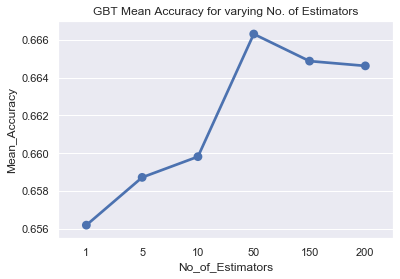

In [ ]:
NT_range = [1, 5, 10, 50, 150, 200]
scores_GB = {}
scores_list_GB = []

for j in NT_range:
        classifierGB = GradientBoostingClassifier(n_estimators=j, random_state=0)
        scores_GB=cross_val_score(estimator=classifierGB, X=X_train, y=y_train, cv=10)
        scores_list_GB.append(scores_GB.mean())
        #print(j)
        #print(scores_GB.mean())

df_plot = pd.DataFrame({'No_of_Estimators': NT_range, 'Mean_Accuracy': scores_list_GB})
plt.title('GBT Mean Accuracy for varying No. of Estimators')
sns.set_theme(style="darkgrid")
ax = sns.pointplot(x="No_of_Estimators", y="Mean_Accuracy", data=df_plot)

In [ ]:
clfGBC = GradientBoostingClassifier(n_estimators=50, random_state=0)
print("Gradient Boost Tree Score on test data: ")
clfGBC.fit(X_train, y_train).score(X_test, y_test)

Gradient Boost Tree Score on test data: 


0.6766588076793533

## Feature Selection

Based on the observation of the data, we know PHU City and Lat. & Long. represent the same information. Therefore, we will be dropping the PHU_City in order to avoid long list of feautres. We will be dropping rows with GENDER DIVERSE (treating them as outliers) and UNSPECIFIED (treating them as missing values). As Gender is treated as categorical data, this reduce the total number of features to 12. 

In [ ]:
df = df_pp

#Here, we are dropping rows with GENDER DIVERSE (treating them as outliers) and UNSPECIFIED (treating them as missing values) 
df.drop(df[df['Client_Gender'] == 'GENDER DIVERSE'].index, inplace = True) 
df.drop(df[df['Client_Gender'] == 'UNSPECIFIED'].index, inplace = True) 
df = df.reset_index(drop=True)

#One-hot-encoding
enc = OneHotEncoder(handle_unknown='ignore')

en_CG = enc.fit_transform(df[['Client_Gender']]).toarray()
column_name_Gender = enc.get_feature_names(['Client_Gender'])
enc_df_Gender = pd.DataFrame(en_CG, columns= column_name_Gender)

en_CA = enc.fit_transform(df[['Case_AcquisitionInfo']]).toarray()
column_name_CA = enc.get_feature_names(['Case_AcquisitionInfo'])
enc_df_CA = pd.DataFrame(en_CA, columns= column_name_CA)

df = df.join(enc_df_Gender)
df = df.join(enc_df_CA)

df = df.drop(['Client_Gender'], axis = 1) 
#df = df.drop(['Client_Gender_MALE'], axis = 1) 
df = df.drop(['Case_AcquisitionInfo'], axis = 1) 
#df = df.drop(['Case_AcquisitionInfo_CC'], axis = 1) 
df = df.drop(['Reporting_PHU_City'], axis = 1) 
df_OC = df['Outcome1']
df = df.drop(['Outcome1'], axis = 1) 
dfX = df
df = df.join(df_OC)

X = df.iloc[:,:-1].values
y = df.iloc[:,12].values #12

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 275)

print(df.shape)
df

(14739, 13)


,Age_Group,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Client_Gender_FEMALE,Client_Gender_MALE,Case_AcquisitionInfo_CC,Case_AcquisitionInfo_MISSING INFORMATION,Case_AcquisitionInfo_NO KNOWN EPI LINK,Case_AcquisitionInfo_OB,Case_AcquisitionInfo_TRAVEL,Case_AcquisitionInfo_UNSPECIFIED EPI LINK,Outcome1
0,50,0,43.413997,-79.744796,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2
1,20,0,43.524881,-80.233743,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
2,90,1,44.410713,-79.686306,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
3,20,0,43.656591,-79.379358,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
4,90,1,45.345665,-75.763912,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14734,10,0,43.257631,-79.871341,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
14735,20,0,43.647471,-79.708893,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
14736,80,1,43.116537,-79.241220,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
14737,50,0,44.048023,-79.480239,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0


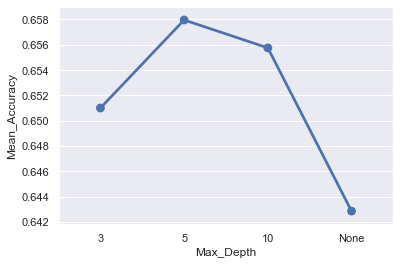

In [ ]:
MD_range_F = [3, 5, 10, None]

scores_list_for = []
for k in MD_range_F:
    #print(k)
    clf = DecisionTreeClassifier(max_depth=k, random_state=0)
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10)
    scores_list_for.append(scores.mean())
    #print(scores.mean())

MD_range_T = ['3', '5', '10', 'None']
df_plot = pd.DataFrame({'Max_Depth': MD_range_T, 'Mean_Accuracy': scores_list_for})
sns.set_theme(style="darkgrid")
ax = sns.pointplot(x="Max_Depth", y="Mean_Accuracy", data=df_plot)

As discussed in CM1, we are evaluating the Decision tree on our training data using 10-fold cross-vlaidation to find the optimal tree depth.

The method selects tree depth 10 because it achieves the best average accuracy on training data using cross-validation folds with size 10.

The tree depth 5 we chose via cross-validation helps us avoiding overfitting compared to tree depth of "10" and "None" and gives a better chance to reproduce the accuracy and generalize the model on test data.
However, this plot shows the val_accuracy reducing for 10 and None. This tells us the dataset has misleading information. With a higher max-depth, the model tends to overfit and works poorly on validation data. 

In [ ]:
DT_clf = DecisionTreeClassifier(max_depth=5, random_state=0)
print("Decision Tree Score on train data after Feature Selection (Max_Depth-5): ")
print(DT_clf.fit(X_train, y_train).score(X_train, y_train))
print("Decision Tree Score on test data after Feature Selection (Max_Depth-5): ")
print(DT_clf.fit(X_train, y_train).score(X_test, y_test))

DT_clf = DecisionTreeClassifier(max_depth=10, random_state=0)
print("Decision Tree Score on train data after Feature Selection (Max_Depth-10): ")
print(DT_clf.fit(X_train, y_train).score(X_train, y_train))
print("Decision Tree Score on test data after Feature Selection (Max_Depth-10): ")
print(DT_clf.fit(X_train, y_train).score(X_test, y_test))

Decision Tree Score on train data after Feature Selection (Max_Depth-5): 
0.6640658129081503
Decision Tree Score on test data after Feature Selection (Max_Depth-5): 
0.6668928086838535
Decision Tree Score on train data after Feature Selection (Max_Depth-10): 
0.6915443982698668
Decision Tree Score on test data after Feature Selection (Max_Depth-10): 
0.6672320217096337


As seen above, its clear that a Max-Depth of 5 performs well on test data compared to Max-Depth of 10. Because the model was able to generalize better with a depth of 5.

After feautre selection, the accuracy is slightly less than that of before feature selection. This could be because the dataset before feature selection had approx. 100 additional rows which had misleading or missing information such as Gender-diverse and Gender Unspecified. The model could have predicted the correct classes for the test data with those missing/misleading information. However, that is not accurate and cannot be used even though the previous mode (before preporcessing) showed better val_score. 

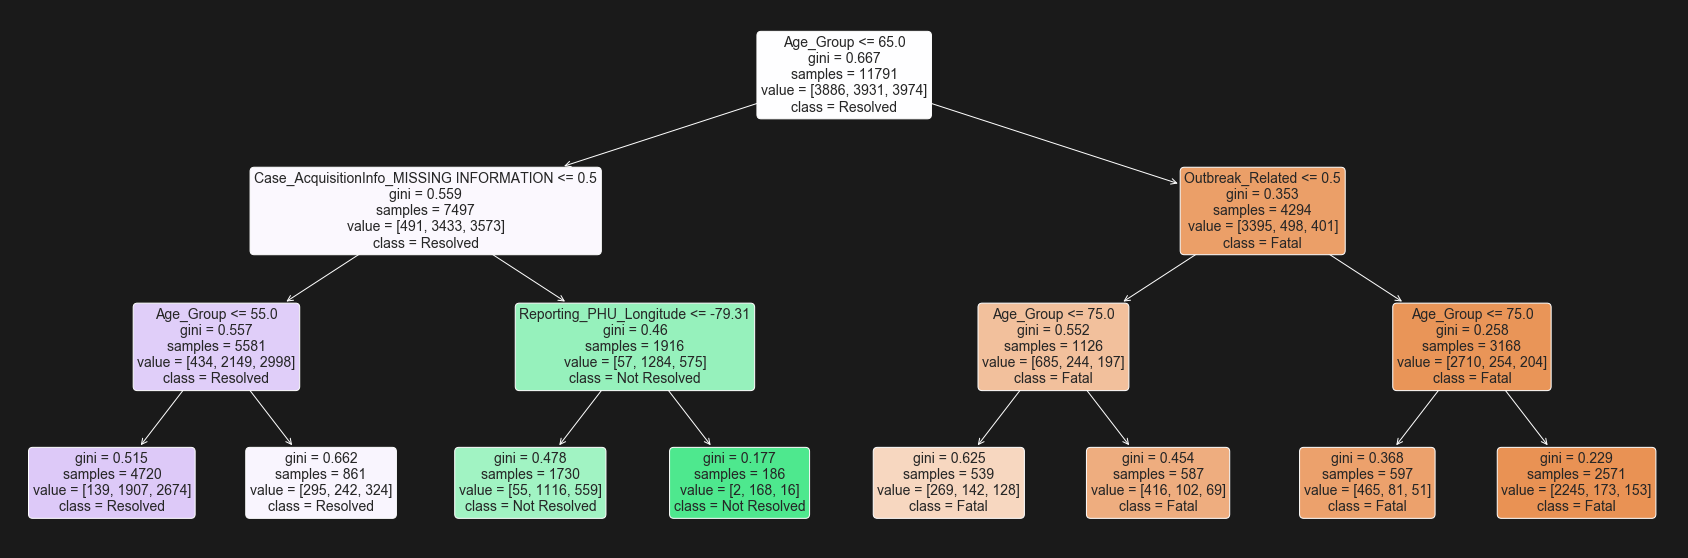

In [ ]:
#plt the figure, setting a black background
DT_clf1 = DecisionTreeClassifier(max_depth=3, random_state=0)
DT_clf1.fit(X_train, y_train)
plt.figure(figsize=(30,10), facecolor ='k')

dfX = df.drop(['Outcome1'], axis = 1) 
feature_names = dfX.columns
labels = ['Fatal', 'Not Resolved', 'Resolved']

#create the tree plot
a = tree.plot_tree(DT_clf1,
                   #use the feature names stored
                   feature_names = feature_names,
                   #use the class names stored
                   class_names = labels,
                   rounded = True,
                   filled = True,
                   fontsize=14)
#show the plot
plt.show()

Here, the first split node is based on the age_group, with being greater than 60s being identified as Fatal (with a gini index of 0.353 with 4294 samples, therefore majority of samples in this node are with Fatal outcome), while those with less than 60s being classed as Resolved (gini index of 0.559 with 7497). 
However, a further split occurs for those with length_of_kernel_groove less than 5.573, with four further splits to end up with more accurate final classifications. 

It's important to note that at max-depth of 3, none of the leafs are pure and have relatively high gini index compared to that of Wheat Dataset.

In [ ]:
test_pred_decision_tree = DT_clf.predict(X_test)

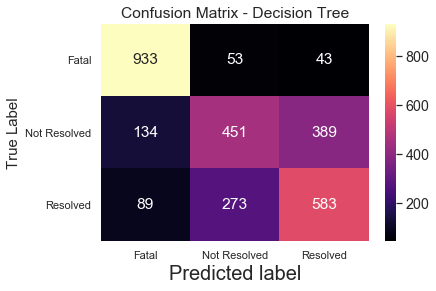

<Figure size 720x504 with 0 Axes>

In [ ]:
#import the relevant packages
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)
#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =20)
ax.set_xticklabels(labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

In [ ]:
print(metrics.classification_report(y_test,test_pred_decision_tree))

              precision    recall  f1-score   support

           0       0.81      0.91      0.85      1029
           1       0.58      0.46      0.52       974
           2       0.57      0.62      0.59       945

    accuracy                           0.67      2948
   macro avg       0.65      0.66      0.65      2948
weighted avg       0.66      0.67      0.66      2948



In [ ]:
importance = pd.DataFrame({'feature': dfX.columns, 
'importance' : np.round(DT_clf.feature_importances_, 3)})
importance.sort_values('importance', ascending=False, inplace = True)
print(importance)

                                      feature  importance
0                                   Age_Group       0.740
7    Case_AcquisitionInfo_MISSING INFORMATION       0.068
3                     Reporting_PHU_Longitude       0.063
2                      Reporting_PHU_Latitude       0.044
1                            Outbreak_Related       0.032
9                     Case_AcquisitionInfo_OB       0.019
5                          Client_Gender_MALE       0.012
4                        Client_Gender_FEMALE       0.007
6                     Case_AcquisitionInfo_CC       0.006
8      Case_AcquisitionInfo_NO KNOWN EPI LINK       0.006
10                Case_AcquisitionInfo_TRAVEL       0.003
11  Case_AcquisitionInfo_UNSPECIFIED EPI LINK       0.000


Age_Group is the most important feature for Decision Tree and as observed in the tree plot, Age_group is the first split. It's important to note that above 60s had most FATAL outcomes.

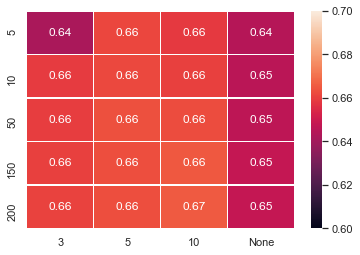

In [ ]:
MD_range = [3, 5, 10, None]
NT_range = [5, 10, 50, 150, 200]
scores_RF= {}
scores_list_RF = np.zeros( (5, 4) )

lj=0
for j in NT_range:
    lk=0 
    for k in MD_range:
        classifier = RandomForestClassifier(n_estimators=j, max_depth=k, random_state=0)
        scores_RF=cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
        scores_list_RF[lj,lk] = scores_RF.mean()
        lk=lk+1
    lj=lj+1

#print(scores_list_RF)
sns.set_theme()
MD_range_Xaxis = [3, 5, 10, "None"]
ax = sns.heatmap(scores_list_RF, annot=True, vmin=0.6, vmax=0.7, xticklabels=MD_range_Xaxis, yticklabels=NT_range, linewidths=.5)

In this heatmap, we see that one of the highest accuracy value on the cross-validation is close to 67% when the max_depth is set to 5, 10. In order to avoid overfitting, we choose, max deth to be 5.

We can define the number of decision trees in the forest via n_estimators hyperparameter. Including more number of decision trees typically improve model accuracy. In random forest, predictions are made based on a larger number of votes from different types of trees, however, it could get computationally expensive due to the large numbers of trees. Therefore, we choose n_estimators to be 50 as it provides good accuracy and relatively less computationally expensive.

In [ ]:
clfRF = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=0)
print("Random Forest Score on train data: ")
print(clfRF.fit(X_train, y_train).score(X_train, y_train))
print("Random Forest Score on test data: ")
print(clfRF.fit(X_train, y_train).score(X_test, y_test))

Random Forest Score on train data: 
0.6665253159189212
Random Forest Score on test data: 
0.6743554952510177


This model performs well on test data compared to train data which means it did not overfit.

In [ ]:
test_pred_RF = clfRF.predict(X_test)

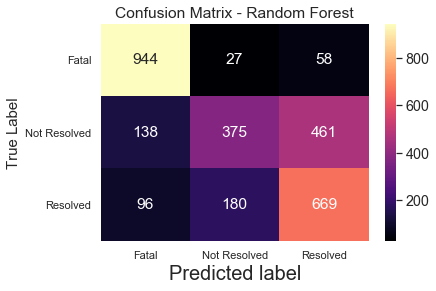

<Figure size 720x504 with 0 Axes>

In [ ]:
#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_RF)
#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - Random Forest')
ax.set_xlabel("Predicted label", fontsize =20)
ax.set_xticklabels(labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

In [ ]:
print(metrics.classification_report(y_test,test_pred_RF))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1029
           1       0.64      0.39      0.48       974
           2       0.56      0.71      0.63       945

    accuracy                           0.67      2948
   macro avg       0.67      0.67      0.65      2948
weighted avg       0.67      0.67      0.66      2948



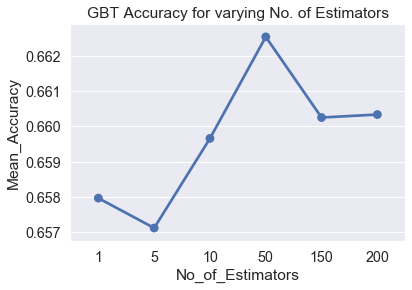

In [ ]:
NT_range = [1, 5, 10, 50, 150, 200]
scores_GB = {}
scores_list_GB = []

for j in NT_range:
        classifierGB = GradientBoostingClassifier(n_estimators=j, random_state=0)
        scores_GB=cross_val_score(estimator=classifierGB, X=X_train, y=y_train, cv=10)
        scores_list_GB.append(scores_GB.mean())
        #print(j)
        #print(scores_GB.mean())

df_plot = pd.DataFrame({'No_of_Estimators': NT_range, 'Mean_Accuracy': scores_list_GB})
plt.title('GBT Accuracy for varying No. of Estimators')
sns.set_theme(style="darkgrid")
ax = sns.pointplot(x="No_of_Estimators", y="Mean_Accuracy", data=df_plot)

The hyperparameter n_estimators represents the number of trees in the forest. It is usually the higher the number of trees the better to learn the data. However, adding a lot of trees can slow down the training process. Also, in the above plot, the mean_accuracy drops after 50, this could due to boosting focusing on correctly predicting classes that contain misinformation, and in the process, decreasing the average performance on other classes. 

In [ ]:
clfGBC_F = GradientBoostingClassifier(n_estimators=50, random_state=0)
print("Gradient Boost Tree Score on train data after Feature Selection: ")
print(clfGBC_F.fit(X_train, y_train).score(X_train, y_train))
print("Gradient Boost Tree Score on test data after Feature Selection: ")
print(clfGBC_F.fit(X_train, y_train).score(X_test, y_test))

Gradient Boost Tree Score on train data after Feature Selection: 
0.6707658383512849
Gradient Boost Tree Score on test data after Feature Selection: 
0.6777476255088195


In [ ]:
test_pred_GBT = clfGBC_F.predict(X_test)

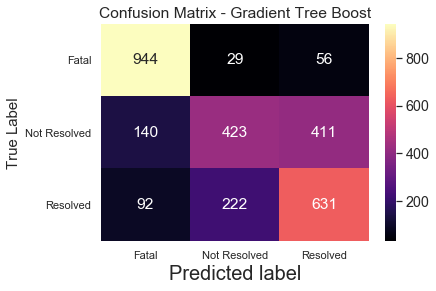

<Figure size 720x504 with 0 Axes>

In [ ]:
#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_GBT)
#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - Gradient Tree Boost')
ax.set_xlabel("Predicted label", fontsize =20)
ax.set_xticklabels(labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

In [ ]:
print(metrics.classification_report(y_test,test_pred_GBT))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1029
           1       0.63      0.43      0.51       974
           2       0.57      0.67      0.62       945

    accuracy                           0.68      2948
   macro avg       0.67      0.67      0.66      2948
weighted avg       0.67      0.68      0.67      2948



The accuracy of Gradient Boost classifier is better than the other 02 classifiers. All three classifers were precise in predicting Fatal classes compared to other 02 classes. The recall for Fatal classes for all three models were above 0.92, this tells us that all 03 classifiers performed well relative to false negatives. However, Decision Tree identified lesser True positives of Fatal labels compared to RF and GB classifiers. It's interesting that all three models were good classifiers for identifying FATAL outcomes compared to Resolved and Not resolved. But as expected, Gradient boost performed better in terms of accuracy. 

## After Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X[:,[2,3]]  = sc_X.fit_transform(X[:,[2,3]])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 275)

NameError: ignored

Decision Tree Score on train data after Feature Selection (Max_Depth-5): 
0.6640658129081503
Decision Tree Score on test data after Feature Selection (Max_Depth-5): 
0.6668928086838535


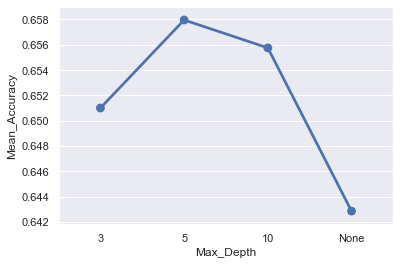

In [ ]:
MD_range_F = [3, 5, 10, None]

scores_list_for = []
for k in MD_range_F:
    #print(k)
    clf = DecisionTreeClassifier(max_depth=k, random_state=0)
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10)
    scores_list_for.append(scores.mean())
    #print(scores.mean())

MD_range_T = ['3', '5', '10', 'None']
df_plot = pd.DataFrame({'Max_Depth': MD_range_T, 'Mean_Accuracy': scores_list_for})
sns.set_theme(style="darkgrid")
ax = sns.pointplot(x="Max_Depth", y="Mean_Accuracy", data=df_plot)

DT_clf = DecisionTreeClassifier(max_depth=5, random_state=0)
print("Decision Tree Score on train data after Feature Selection (Max_Depth-5): ")
print(DT_clf.fit(X_train, y_train).score(X_train, y_train))
print("Decision Tree Score on test data after Feature Selection (Max_Depth-5): ")
print(DT_clf.fit(X_train, y_train).score(X_test, y_test))

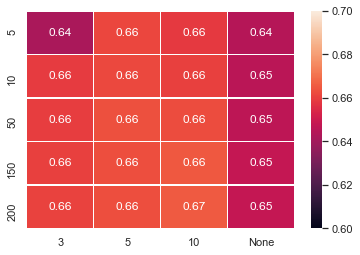

In [ ]:
MD_range = [3, 5, 10, None]
NT_range = [5, 10, 50, 150, 200]
scores_RF= {}
scores_list_RF = np.zeros( (5, 4) )

lj=0
for j in NT_range:
    lk=0 
    for k in MD_range:
        classifier = RandomForestClassifier(n_estimators=j, max_depth=k, random_state=0)
        scores_RF=cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
        scores_list_RF[lj,lk] = scores_RF.mean()
        lk=lk+1
    lj=lj+1

#print(scores_list_RF)
sns.set_theme()
MD_range_Xaxis = [3, 5, 10, "None"]
ax = sns.heatmap(scores_list_RF, annot=True, vmin=0.6, vmax=0.7, xticklabels=MD_range_Xaxis, yticklabels=NT_range, linewidths=.5)

In [ ]:
clfRF = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=0)
print("Random Forest Score on train data: ")
print(clfRF.fit(X_train, y_train).score(X_train, y_train))
print("Random Forest Score on test data: ")
print(clfRF.fit(X_train, y_train).score(X_test, y_test))

Random Forest Score on train data: 
0.7060469849885506
Random Forest Score on test data: 
0.6719810040705563


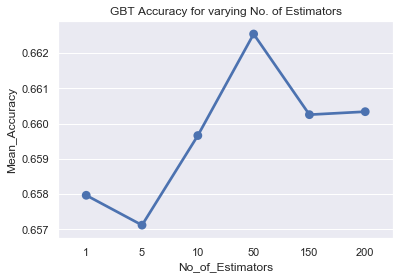

In [ ]:
NT_range = [1, 5, 10, 50, 150, 200]
scores_GB = {}
scores_list_GB = []

for j in NT_range:
        classifierGB = GradientBoostingClassifier(n_estimators=j, random_state=0)
        scores_GB=cross_val_score(estimator=classifierGB, X=X_train, y=y_train, cv=10)
        scores_list_GB.append(scores_GB.mean())
        #print(j)
        #print(scores_GB.mean())

df_plot = pd.DataFrame({'No_of_Estimators': NT_range, 'Mean_Accuracy': scores_list_GB})
plt.title('GBT Accuracy for varying No. of Estimators')
sns.set_theme(style="darkgrid")
ax = sns.pointplot(x="No_of_Estimators", y="Mean_Accuracy", data=df_plot)

In [ ]:
clfGBC = GradientBoostingClassifier(n_estimators=50, random_state=0)
print("Gradient Boost Tree Score on train data after Feature Selection: ")
print(clfGBC.fit(X_train, y_train).score(X_train, y_train))
print("Gradient Boost Tree Score on test data after Feature Selection: ")
print(clfGBC.fit(X_train, y_train).score(X_test, y_test))

Gradient Boost Tree Score on train data after Feature Selection: 
0.6707658383512849
Gradient Boost Tree Score on test data after Feature Selection: 
0.6777476255088195


As expected, there is no effect on val_accuracy after normalization for decision trees. In decision tree, we are just comparing feature values and branching down the tree, so normalization would not help. However, the ordering of values are important so we should make sure any transformation preserves the ordering. 

In [ ]:
#This is for Kaggle
df = pd.read_csv('covid_test.csv')
print(df.shape)
#Here 10 indicates less <10
df.loc[(df.Age_Group == '<20'),'Age_Group']='10'
df['Outbreak_Related'] = df['Outbreak_Related'].fillna("No")

df['Age_Group'] = df['Age_Group'].str.replace(r'\D', '')
df.isnull().sum(axis=0)

print(df.shape)
print(df.Client_Gender.value_counts())

from sklearn import preprocessing
leOR = preprocessing.LabelEncoder()
leAg = preprocessing.LabelEncoder()

leOR.fit(df.Outbreak_Related)
leOR.fit(['Yes', 'No'])
leOR.classes_
df['Outbreak_Related'] = leOR.transform(df['Outbreak_Related'])

leAg.fit(df.Age_Group)
leAg.fit(['10', '20', '30', '40', '50', '60', '70', '80', '90'])
leAg.classes_
#df['Age_Group'] = leAg.transform(df['Age_Group'])

from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

# passing bridge-types-cat column (label encoded values of bridge_types)
en_CG = enc.fit_transform(df[['Client_Gender']]).toarray()
column_name_Gender = enc.get_feature_names(['Client_Gender'])
enc_df_Gender = pd.DataFrame(en_CG, columns= column_name_Gender)

en_CA = enc.fit_transform(df[['Case_AcquisitionInfo']]).toarray()
column_name_CA = enc.get_feature_names(['Case_AcquisitionInfo'])
enc_df_CA = pd.DataFrame(en_CA, columns= column_name_CA)

df = df.join(enc_df_Gender)
df = df.join(enc_df_CA)

df = df.drop(['Client_Gender'], axis = 1) 
#df = df.drop(['Client_Gender_MALE'], axis = 1) 
df = df.drop(['Case_AcquisitionInfo'], axis = 1) 
#df = df.drop(['Case_AcquisitionInfo_CC'], axis = 1) 
df = df.drop(['Reporting_PHU_City'], axis = 1)
df = df.drop(['Client_Gender_UNSPECIFIED'], axis = 1) 
df_ID = df['id']
df = df.drop(['id'], axis = 1) 

X_FT = df.iloc[:,:].values
y_pred_k = clfGBC_F.predict(X_FT)
print(y_pred_k)
#print(df.shape)

(3713, 8)
(3713, 8)
FEMALE         1850
MALE           1848
UNSPECIFIED      15
Name: Client_Gender, dtype: int64
[0 0 1 ... 0 0 0]


In [ ]:
y_tar = le.inverse_transform(y_pred_k)
print(y_tar)
print(y_tar.shape)

['Fatal' 'Fatal' 'Not Resolved' ... 'Fatal' 'Fatal' 'Fatal']
(3713,)


In [ ]:
my_submission = pd.DataFrame({'id': df_ID, 'Outcome1': y_tar})
my_submission.to_csv('submission_covid-02.csv', index=False)